<a href="https://colab.research.google.com/github/ppaunovski/ml_labs/blob/master/ML_lab02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [145]:
! pip install -q kaggle

In [146]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"pavelpaunovski","key":"1269162bb6c24a951928fb1beebb2532"}'}

In [147]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [148]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [149]:
! kaggle datasets download -d sahirmaharajj/employee-salaries-analysis

employee-salaries-analysis.zip: Skipping, found more recently modified local copy (use --force to force download)


In [150]:
! mkdir dataset
! unzip employee-salaries-analysis.zip -d dataset

mkdir: cannot create directory ‘dataset’: File exists
Archive:  employee-salaries-analysis.zip
replace dataset/Employee_Salaries.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [202]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [203]:
df = pd.read_csv('/content/dataset/Employee_Salaries.csv')

In [204]:
df.head()

,Department,Department_Name,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay,Grade
0,ABS,Alcohol Beverage Services,ABS 85 Administration,M,175873.000,0.00,0.0,M2
1,ABS,Alcohol Beverage Services,ABS 85 Administration,M,145613.360,0.00,0.0,M3
2,ABS,Alcohol Beverage Services,ABS 85 Administration,F,136970.000,0.00,0.0,M3
3,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,89432.694,0.00,2490.0,21
4,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,78947.000,456.68,6257.7,16


<ipython-input-205-cd5294b02144>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='Base_Salary', y='Gender', inner='box', palette='Dark2')


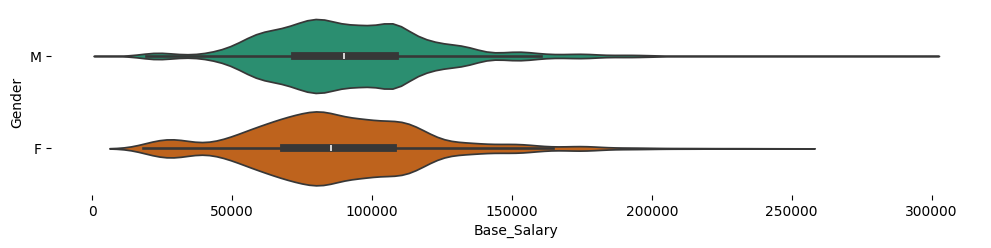

In [205]:
figsize = (12, 1.2 * len(df['Gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Base_Salary', y='Gender', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

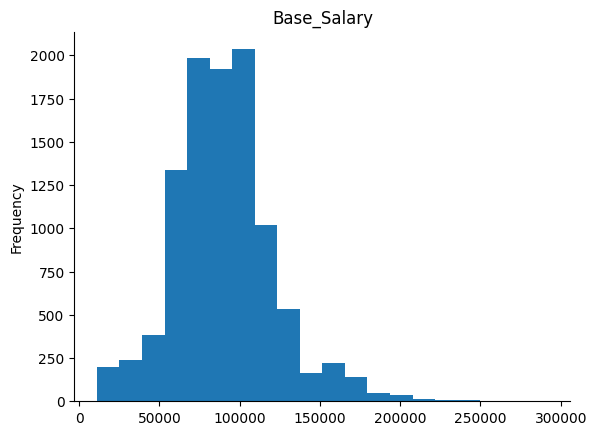

In [206]:
df['Base_Salary'].plot(kind='hist', bins=20, title='Base_Salary')
plt.gca().spines[['top', 'right',]].set_visible(False)

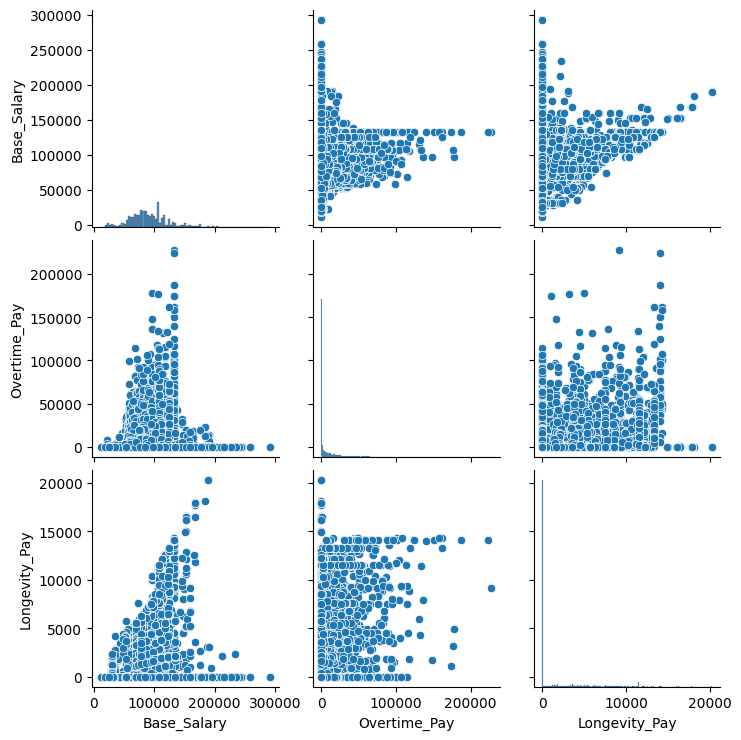

In [207]:
sns.pairplot(df)

In [208]:
from sklearn.preprocessing import LabelEncoder

In [209]:
df = df.drop(columns=['Department_Name'])
df.head()

,Department,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay,Grade
0,ABS,ABS 85 Administration,M,175873.000,0.00,0.0,M2
1,ABS,ABS 85 Administration,M,145613.360,0.00,0.0,M3
2,ABS,ABS 85 Administration,F,136970.000,0.00,0.0,M3
3,ABS,ABS 85 Administrative Services,F,89432.694,0.00,2490.0,21
4,ABS,ABS 85 Administrative Services,F,78947.000,456.68,6257.7,16


In [210]:
encoder = LabelEncoder()
df.Department = encoder.fit_transform(df.Department)

In [211]:
df.Division = encoder.fit_transform(df.Division)

In [212]:
df.Gender = encoder.fit_transform(df.Gender)

In [213]:
df

,Department,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay,Grade
0,0,0,1,175873.0000,0.00,0.00,M2
1,0,0,1,145613.3600,0.00,0.00,M3
2,0,0,0,136970.0000,0.00,0.00,M3
3,0,1,0,89432.6940,0.00,2490.00,21
4,0,1,0,78947.0000,456.68,6257.70,16
...,...,...,...,...,...,...,...
10286,40,622,1,134500.0000,0.00,0.00,N28
10287,41,624,0,215032.1000,0.00,0.00,NaN
10288,41,625,0,84365.5529,0.00,0.00,N18
10289,41,626,0,98228.0000,0.00,1596.27,N21


In [214]:
df.isnull().sum()

Department        0
Division          0
Gender            0
Base_Salary       0
Overtime_Pay      0
Longevity_Pay     0
Grade            33
dtype: int64

In [215]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [216]:
import numpy as np

def encode_but_null(column):
  new_column = []
  dict = {np.NaN: -1}
  code = 0
  for entry in column:
    if entry not in dict.keys():
      dict[entry] = code
      code = code + 1
    new_column.append(dict[entry])

  return new_column


In [217]:
df.Grade = encode_but_null(df.Grade)

In [218]:
def return_null(column):
  new_col = []
  for entry in column:
    new_col.append(np.NaN if entry == -1 else entry)

  return new_col


In [219]:
df.Grade = return_null(df.Grade)
df

,Department,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay,Grade
0,0,0,1,175873.0000,0.00,0.00,0.0
1,0,0,1,145613.3600,0.00,0.00,1.0
2,0,0,0,136970.0000,0.00,0.00,1.0
3,0,1,0,89432.6940,0.00,2490.00,2.0
4,0,1,0,78947.0000,456.68,6257.70,3.0
...,...,...,...,...,...,...,...
10286,40,622,1,134500.0000,0.00,0.00,19.0
10287,41,624,0,215032.1000,0.00,0.00,NaN
10288,41,625,0,84365.5529,0.00,0.00,11.0
10289,41,626,0,98228.0000,0.00,1596.27,17.0


In [220]:
imputer = IterativeImputer()
imputer.fit(df)

IterativeImputer()

In [221]:
df_old = df
df = pd.DataFrame(imputer.transform(df), columns=df.columns)

In [222]:
df

,Department,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay,Grade
0,0.0,0.0,1.0,175873.0000,0.00,0.00,0.000000
1,0.0,0.0,1.0,145613.3600,0.00,0.00,1.000000
2,0.0,0.0,0.0,136970.0000,0.00,0.00,1.000000
3,0.0,1.0,0.0,89432.6940,0.00,2490.00,2.000000
4,0.0,1.0,0.0,78947.0000,456.68,6257.70,3.000000
...,...,...,...,...,...,...,...
10286,40.0,622.0,1.0,134500.0000,0.00,0.00,19.000000
10287,41.0,624.0,0.0,215032.1000,0.00,0.00,37.177186
10288,41.0,625.0,0.0,84365.5529,0.00,0.00,11.000000
10289,41.0,626.0,0.0,98228.0000,0.00,1596.27,17.000000


<Axes: >

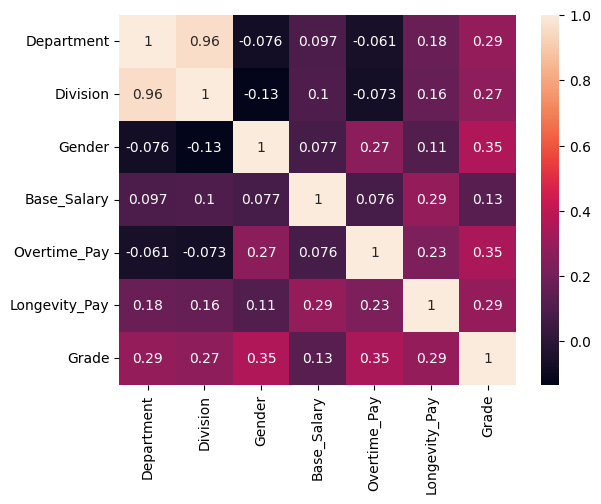

In [223]:
sns.heatmap(df.corr(), annot=True)

In [224]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [225]:
cont_features = ['Overtime_Pay', 'Longevity_Pay']

In [226]:
df_prescaled = df

X, y = df.drop(columns=['Base_Salary']), df['Base_Salary']



        ◦ LinearRegression
        ◦ Ridge
        ◦ Lasso
        ◦ ElasticNet
        ◦ BayesianRidge

In [227]:
from sklearn.linear_model import LinearRegression, ElasticNet, LassoCV, RidgeCV, ElasticNet, BayesianRidge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [228]:
models = {
    "LinearRegression": LinearRegression(),
    "ElasticNet": ElasticNet(),
    "LassoCV": LassoCV(cv = 5),
    "RidgeCV": RidgeCV(cv = 5),
    "BayesianRidge": BayesianRidge()
}


In [229]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Base_Salary']), df['Base_Salary'], test_size = 0.2)

In [230]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = scaler.fit_transform(y_train.to_numpy().reshape(-1,1))

In [231]:
for model in models.values():
  model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [232]:
for model in models:
  y_preds = models[model].predict(X_test)
  print(f'Model {model} has performed with MSE: {mean_squared_error(scaler.inverse_transform(y_preds.reshape(-1,1)), y_test)} and r2 score: {r2_score(scaler.inverse_transform(y_preds.reshape(-1,1)), y_test)}')

Model LinearRegression has performed with MSE: 867896348.9976685 and r2 score: -8.196014946740164
Model ElasticNet has performed with MSE: 959503968.9645315 and r2 score: -4.5311293832185e+30
Model LassoCV has performed with MSE: 867738765.6641488 and r2 score: -8.225345603627172
Model RidgeCV has performed with MSE: 867718452.0845481 and r2 score: -8.285967817332473
Model BayesianRidge has performed with MSE: 867643053.9471158 and r2 score: -8.328320673120004
